In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy import pi

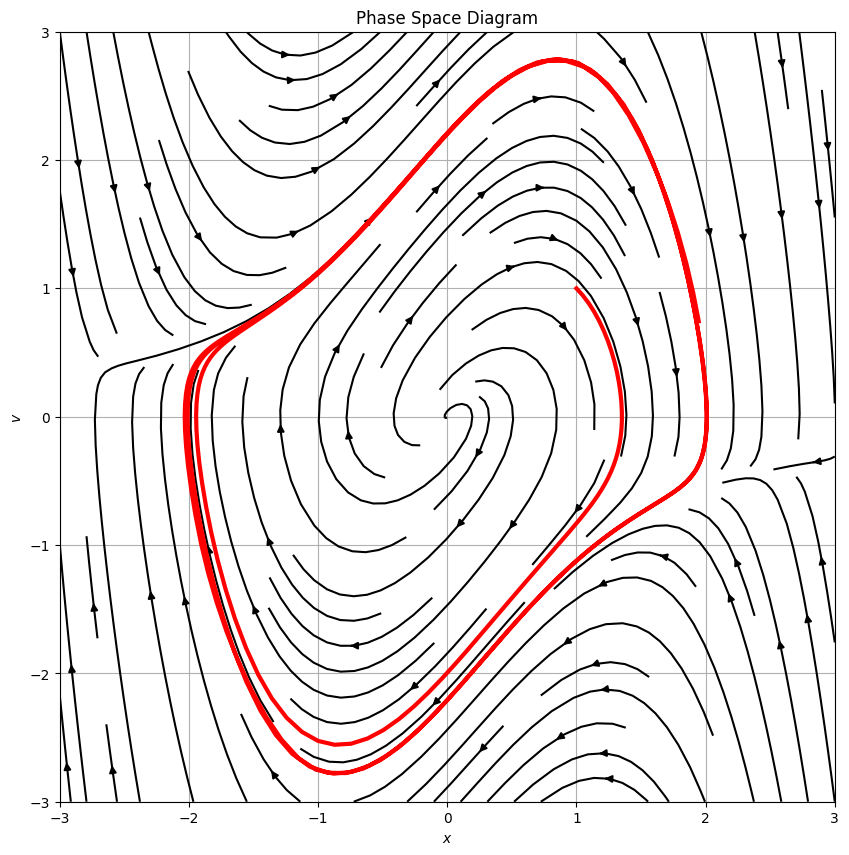

In [3]:
def VP_eqn(x, v, mu = 1.):
    xdot, vdot = [v,-mu*(x**2 - 1) * v - x ] ## CHANGE
    return xdot, vdot

def VP_phase(X, VX, mu):
    xdot, vdot = np.zeros(X.shape), np.zeros(VX.shape)
    Xlim, Ylim = X.shape
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vdot[i,j] = VP_eqn(xloc, yloc,mu)
    return xdot, vdot

def VP_eqn_for_solve_ivp(t,curr_vals, mu=0): # need to rephrase this to work with what solve_ivp expects
    x, v = curr_vals 
    xdot, vdot = VP_eqn(x,v,mu)
    return xdot,vdot

# Numerical Integration
tmax = 20
dt = 0.05
tspan = (0,tmax)
t = np.arange(0,tmax,dt)
mu = 1.1
initial_condition = [1, 1] 
solved = solve_ivp(VP_eqn_for_solve_ivp,tspan,initial_condition,t_eval = t, args = (mu,),method="RK45")


# Plotting stuff
N = 40
x = np.linspace(-3., 3., N)
v = np.linspace(-3., 3., N)
X, V = np.meshgrid(x, v)
xdot, vdot = VP_phase(X, V,mu)
ax = plt.figure(figsize=(10,10))
Q = plt.streamplot(X, V, xdot, vdot, color='k')
plt.plot(solved.y[0],solved.y[1],lw = 3,c = 'red') # plot trajectory from solve_ivp
plt.title('Phase Space Diagram')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$v$')
plt.show()

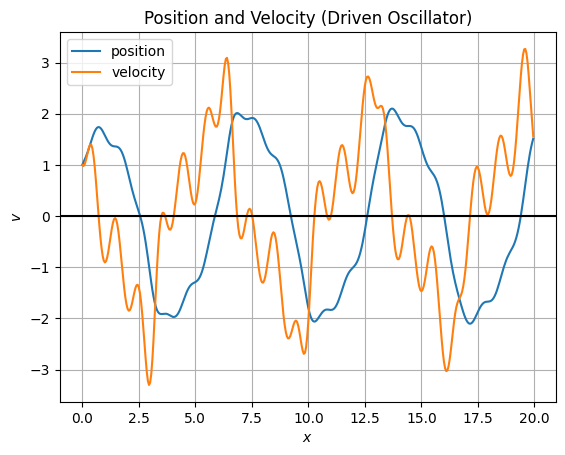

In [4]:
def VP_eqn_DF(t, p0, mu = 1., A=1, omega=2*pi):
    x, v = p0
    xdot, vdot = [v,-mu*(x**2 - 1) * v - x + A*np.sin(omega*t)] ##looks good?
    return xdot, vdot

# Numerical Integration
tmax = 20
dt = 0.05
tspan = (0,tmax)
t = np.arange(0,tmax,dt)
initial_condition = [1, 1] 

mu = 1.1
A = 4
omega = 2*pi
params = [mu, A, omega]

solved = solve_ivp(VP_eqn_DF,tspan, initial_condition, t_eval = t, args = (params), method="RK45")
solved2 = solve_ivp(VP_eqn_DF,tspan, [-2.5, 1], t_eval = t, args = (params), method="RK45")


# Plotting stuff
plt.plot(solved.t, solved.y[0], label = 'position')
plt.plot(solved.t, solved.y[1], label = 'velocity')
plt.axhline(0, color = 'black')
plt.title('Position and Velocity (Driven Oscillator)')
plt.legend()
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$v$')
plt.show()


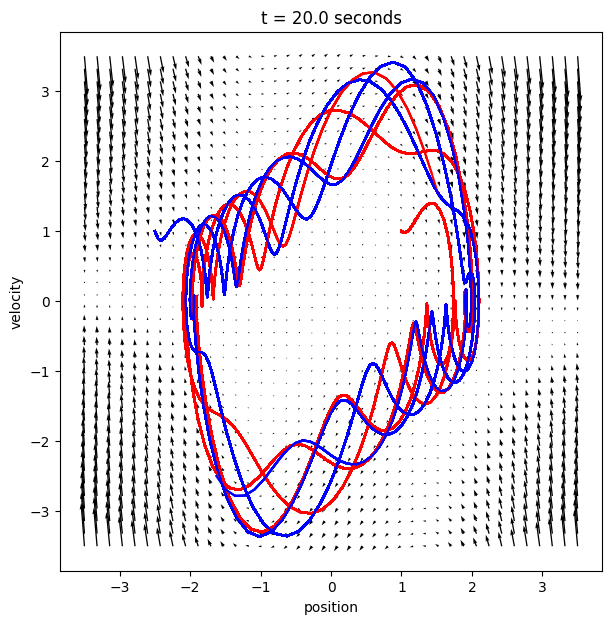

In [6]:
# creating the animation
from matplotlib.animation import PillowWriter

def driven_VP_phase(t, X, VX, params):
    xdot, vdot = np.zeros(X.shape), np.zeros(VX.shape)
    Xlim, Ylim = X.shape
    for i in range(Xlim):
        for j in range(Ylim):
            p0 = (X[i, j], VX[i, j])
            xdot[i,j], vdot[i,j] = VP_eqn_DF(t, p0, *params)
    return xdot, vdot


fig = plt.figure(figsize=(7,7))

t = solved.t
numerical_x = solved.y[0]
numerical_v = solved.y[1]

N = 40
x = np.linspace(-3.5, 3.5, N)
v = np.linspace(-3.5, 3.5, N)
X, V = np.meshgrid(x, v)

dX, dV = driven_VP_phase(0, X, V, params)
field1 = plt.quiver(X, V, dX, dV)

metadata = dict(title='Movie', artist='us')
writer = PillowWriter(fps=1/dt, metadata=metadata)

with writer.saving(fig, 'vanderpol.webp', 100):
    for i, tval in enumerate(t):
        dX, dV = driven_VP_phase(tval, X, V, params)
        plt.title(f't = {tval:.1f} seconds')
        plt.xlabel('position')
        plt.ylabel('velocity')

        field1.set_UVC(dX, dV)

        plt.plot(solved.y[0][:i+1], solved.y[1][:i+1], color='red')
        plt.plot(solved2.y[0][:i+1], solved2.y[1][:i+1], color='blue')

        writer.grab_frame()
        #plt.cla()
